In [1]:
# Excercise 7.6
rm(list=ls())
options(digits=1)
options(scipen=99999)
library(ISLR)  # Wage dset, etc.
library(boot)  # cv.glm, etc.

In [2]:
# Viz data:
attach(Wage)
fix(Wage)

In [3]:
# Summarize data:
summary(Wage)

      year           age                  maritl           race     
 Min.   :2003   Min.   :18   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:34   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51   5. Separated    :  55                  
 Max.   :2009   Max.   :80                                          
                                                                    
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atlantic    :   0           

In [4]:
#########################################################
# Part a: Polynomial Reg using age to predict wage:
#########################################################
# Here I perform linear regression using the GLM function, since then it can be used with cv.glm:
set.seed(1)
cv.error <- rep(0, 10)
for (i in 1:10)
    {
        glm.fit <- glm(wage~poly(age,i), data=Wage)
        cv.error[i] <- cv.glm(data=Wage, glmfit=glm.fit, K=10)$delta[1]
    }
print(cv.error)
print(min(cv.error))

 [1] 1676 1601 1599 1594 1595 1595 1595 1595 1596 1596
[1] 1594


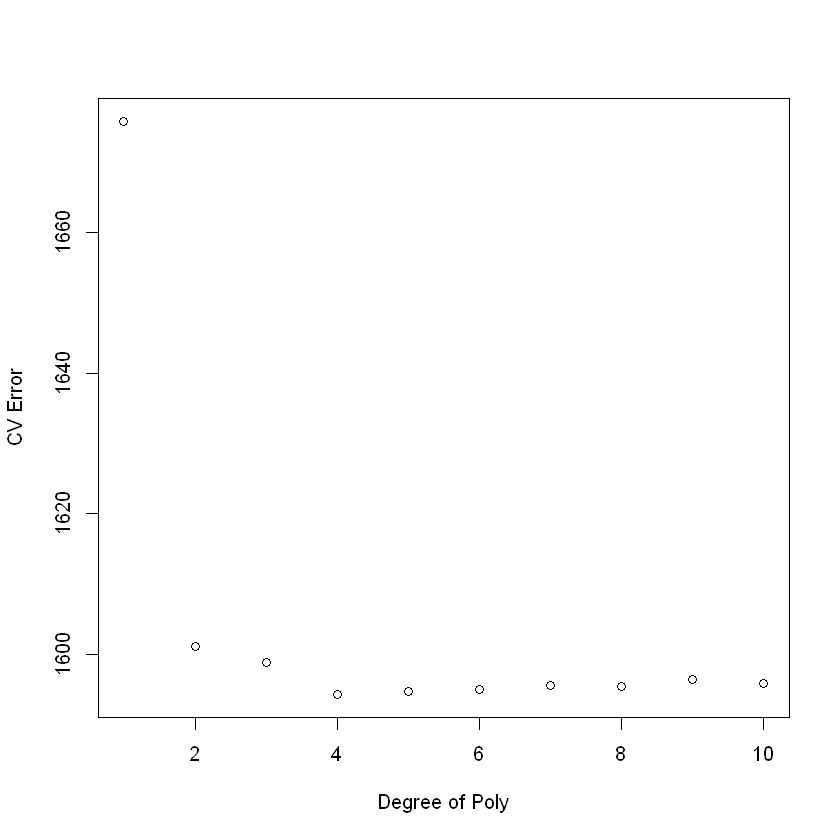

In [5]:
# Clearly the 4th degree poly in age provides the lowest cv error.
plot(seq(1,10,by=1), cv.error, xlab="Degree of Poly", ylab="CV Error")

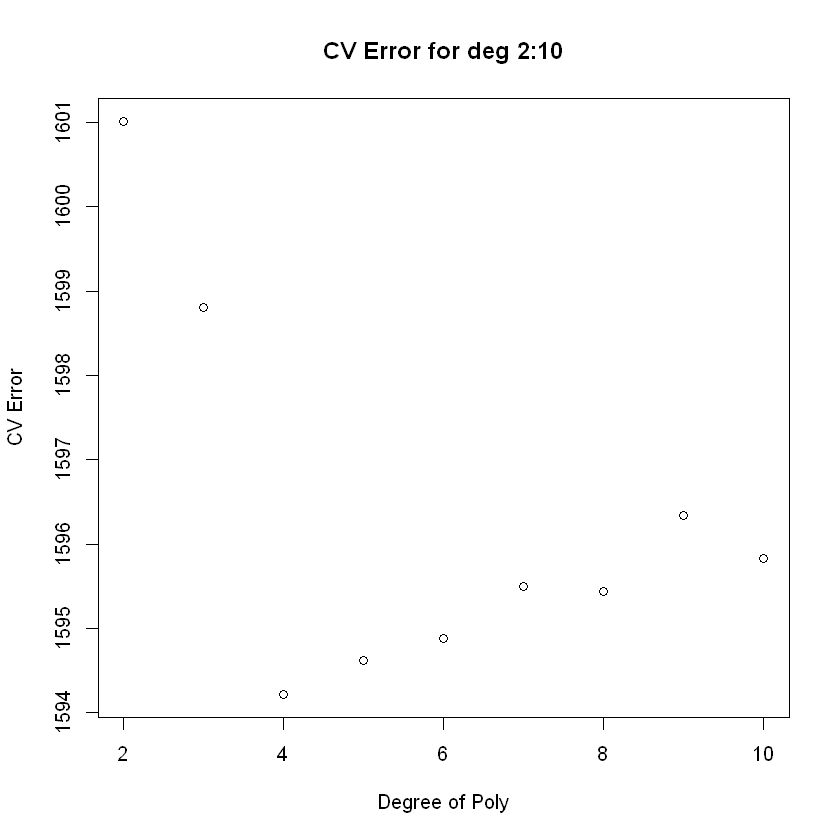

In [6]:
# Here I make a more sensible plot which excludes the value of 1, which makes the plot hard to read.
# This makes it obvious visually that the 4th degree poly minimizes the cv error.
plot(seq(2,10,by=1), cv.error[2:10], xlab="Degree of Poly", ylab="CV Error", main="CV Error for deg 2:10")

In [7]:
# Create 10 poly fits:
fit.1 <- lm(wage~poly(age,1), data=Wage)
fit.2 <- lm(wage~poly(age,2), data=Wage)
fit.3 <- lm(wage~poly(age,3), data=Wage)
fit.4 <- lm(wage~poly(age,4), data=Wage)
fit.5 <- lm(wage~poly(age,5), data=Wage)
fit.6 <- lm(wage~poly(age,6), data=Wage)
fit.7 <- lm(wage~poly(age,7), data=Wage)
fit.8 <- lm(wage~poly(age,8), data=Wage)
fit.9 <- lm(wage~poly(age,9), data=Wage)
fit.10 <- lm(wage~poly(age,10), data=Wage)

In [8]:
anova(fit.1, fit.2, fit.3, fit.4, fit.5, fit.6, fit.7, fit.8, fit.9, fit.10)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2998,5022216,NA,NA,NA,NA
2,2997,4793430,1,228786,143.764,0.00000000000000000000000000000002
3,2996,4777674,1,15756,9.901,0.00166858259572121307885705920881
4,2995,4771604,1,6070,3.814,0.05090873956446297088351826687358
5,2994,4770322,1,1283,0.806,0.36939776998158757592705114802811
6,2993,4766389,1,3932,2.471,0.11607444505432053249993629151504
7,2992,4763834,1,2555,1.606,0.20519893713904557852600873957272
8,2991,4763707,1,127,0.080,0.77786539032246626579336634677020
9,2990,4756703,1,7004,4.401,0.03599424864142259511412547112741


In [9]:
# At the 5% level, this suggests that the 4th degree polynomial is optimal as well.
# Thus both cross-validation and the anova procedure produce the same indication.

In [10]:
# Lastly, we plot the resulting polynomial fit to the data:
newdata <- data.frame(age <- seq(min(age), max(age), by=0.1))
pred1 <- predict(fit.4, newdata)

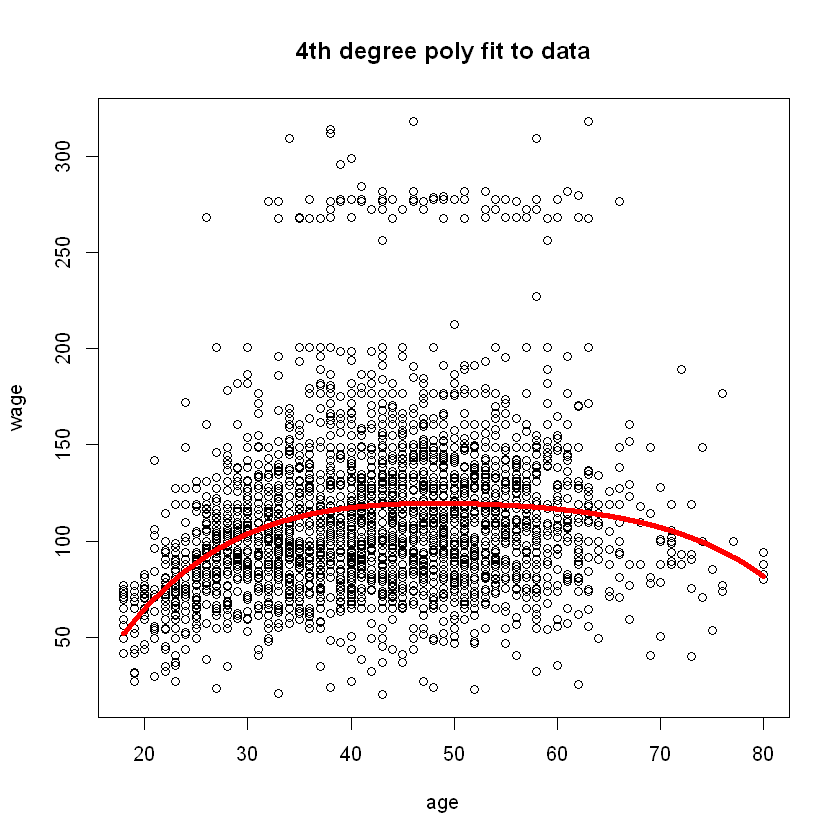

In [12]:
plot(Wage$age, Wage$wage, main="4th degree poly fit to data", xlab="age", ylab="wage" )
lines(newdata[,1], pred1, lwd=4, col="red")

In [14]:
############################################################
# Part b: Use step function to predict wage using age
############################################################
set.seed(1)
cv_error_step <- rep(0, 10)
for (i in 2:10)
    {
        # For each value of i, by creating a new column in the Wage dset called age.cut, this allows the 
        # cutting procedure which was done outside the glm function to be consistent across all iterations
        # of the later cross-validation procedure.
        Wage$age.cut <- cut(Wage$age,i)
        glm.fit <- glm(wage~age.cut, data=Wage)
        cv_error_step[i] <- cv.glm(data=Wage, glmfit=glm.fit, K=10)$delta[1]
    }

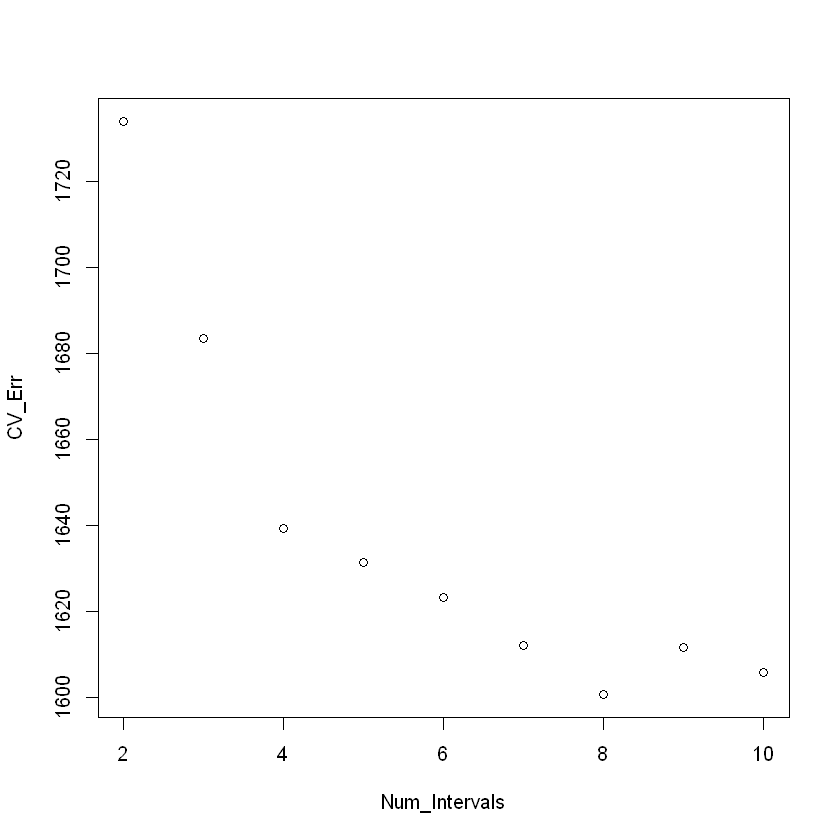

In [15]:
plot(seq(2,10,by=1), cv_error_step[2:10], xlab="Num_Intervals", ylab="CV_Err")

In [16]:
which.min(cv_error_step[2:10])
# This indicates that the 7th item (where the first represents 2 folds) is the min,
# which corresponds to 8 intervals.  Thus 7 cuts = 8 intervals is optimal.

[1] 7

In [17]:
fit.final <- glm(wage~cut(age,8), data=Wage)
agelims <- range(Wage$age)
age.grid <- seq(from=agelims[1], agelims[2])
preds <- predict(fit.final, data.frame(age=age.grid))

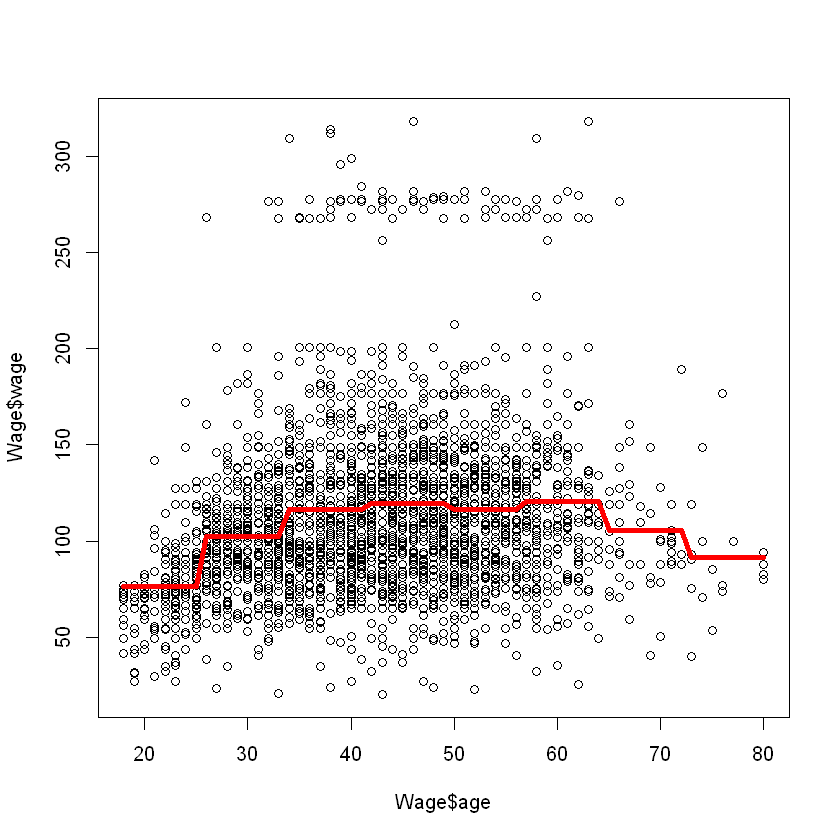

In [18]:
plot(Wage$age, Wage$wage)
lines(age.grid, preds, col="red", lwd=4)

In [19]:
# Above plot shows the points and final fitted step function curve.